<a href="https://colab.research.google.com/github/iamRahulB/Pytorch-practice/blob/main/IMAGE_CLASSIFICATION_FIRST_MODEL_PYTORCH_NON_LINEAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import torch
from torch import nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader

In [13]:
train_data=datasets.FashionMNIST(root="data",
                                 download=True,
                                 transform=transforms.ToTensor(),
                                 target_transform=None,
                                 train=True)

test_data=datasets.FashionMNIST(root='data',
                                download=True,
                                transform=transforms.ToTensor(),
                                target_transform=None,
                                train=False)

In [14]:
len(train_data),len(test_data)

(60000, 10000)

In [15]:
train_data.classes


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

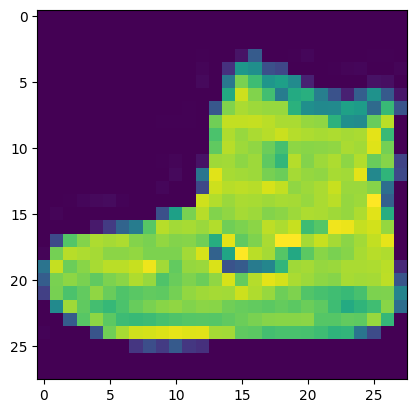

In [19]:
image,label=train_data[0]

image.shape

plt.imshow(image.squeeze())


In [20]:
train_loader=DataLoader(dataset=train_data,
                        batch_size=32,
                        shuffle=True,)

test_loader=DataLoader(dataset=test_data,
                       batch_size=32,
                       shuffle=False)

In [33]:
image,label=next(iter(train_loader))
image,label

# above is images of batch 1 and its labels and it contains 32 images in each batch

image.shape, label.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Above loader has NCHW format -> batch N, color channels, hight, width

In [30]:
flatten_layer=nn.Flatten()

flattened_image=flatten_layer(train_data[0][0])

flattened_image.shape

torch.Size([1, 784])

In [32]:
input_features=784
output_shape=len(train_data.classes)

print(f"Input feature shape is {input_features}")

print(f"Output feature classes are {output_shape}")

Input feature shape is 784
Output feature classes are 10


In [86]:
class CNNBNonLinearModel(nn.Module):
    def __init__(self,input_feature,output_shape):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_feature,32),
            nn.ReLU(),
            nn.Linear(32,64),
            nn.ReLU(),
            nn.Linear(64,output_shape)
        )

    def forward(self,x):
        return self.layer_stack(x)


torch.manual_seed(42)
model=CNNBNonLinearModel(input_feature=input_features,output_shape=output_shape)

model

CNNBNonLinearModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=32, bias=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [87]:
from tqdm import tqdm

In [88]:

loss_fn=nn.CrossEntropyLoss()

optimizer=optim.Adam(params=model.parameters(),lr=0.01)

epochs=2

for epoch in range(epochs):

    model.train()
    avg_train_loss=0
    avg_train_acc=0
    for batch,(X_train,y_train) in enumerate(train_loader):
        train_batch_logits=model(X_train)

        train_batch_preds=train_batch_logits.argmax(dim=1)

        train_batch_loss=loss_fn(train_batch_logits,y_train)

        train_batch_acc=accuracy_score(y_train,train_batch_preds)

        optimizer.zero_grad()
        train_batch_loss.backward()
        optimizer.step()

        avg_train_loss+=train_batch_loss
        avg_train_acc+=train_batch_acc

        if batch % 300 == 0:  # Adjust the frequency as needed
            print(f"Batch {batch} | Loss: {train_batch_loss.item():.4f} | Acc: {train_batch_acc*100:.2f}%")

    model.eval()

    avg_test_loss=0
    avg_test_acc=0
    # model evaluation
    with torch.inference_mode():
        for X_test,y_test in tqdm(test_loader, desc="Evaluating"):
            test_logits=model(X_test)

            test_preds=test_logits.argmax(dim=1)
            test_loss=loss_fn(test_logits,test_preds)

            test_acc=accuracy_score(y_test,test_preds)

            avg_test_loss+=test_loss
            avg_test_acc+=test_acc

    # avg_train_loss, acc are the per batch sum of accuracies so we need to calculate over all acc on the data

    print(f"Epoch: {epoch} | Train Loss: {avg_train_loss/len(train_loader):.4f} | Train Acc: {avg_train_acc/len(train_loader)*100:.2f} | Test loss: {avg_test_loss/len(test_loader):.4f} | Test Acc: {avg_test_acc/len(test_loader)*100:.2f}")


Batch 0 | Loss: 2.2922 | Acc: 9.38%
Batch 300 | Loss: 0.4520 | Acc: 81.25%
Batch 600 | Loss: 0.4945 | Acc: 84.38%
Batch 900 | Loss: 0.4368 | Acc: 84.38%
Batch 1200 | Loss: 0.3225 | Acc: 84.38%
Batch 1500 | Loss: 0.3177 | Acc: 90.62%
Batch 1800 | Loss: 0.7948 | Acc: 65.62%


Evaluating: 100%|██████████| 313/313 [00:01<00:00, 203.19it/s]


Epoch: 0 | Train Loss: 0.5356 | Train Acc: 80.61 | Test loss: 0.2272 | Test Acc: 83.54
Batch 0 | Loss: 0.5345 | Acc: 81.25%
Batch 300 | Loss: 0.2801 | Acc: 90.62%
Batch 600 | Loss: 0.2588 | Acc: 93.75%
Batch 900 | Loss: 0.4362 | Acc: 84.38%
Batch 1200 | Loss: 0.2805 | Acc: 90.62%
Batch 1500 | Loss: 1.0088 | Acc: 78.12%
Batch 1800 | Loss: 0.2825 | Acc: 90.62%


Evaluating: 100%|██████████| 313/313 [00:01<00:00, 200.65it/s]

Epoch: 1 | Train Loss: 0.4427 | Train Acc: 84.08 | Test loss: 0.1699 | Test Acc: 84.75


In [72]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28))  # Adjust input_size to match your model's input


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                   [-1, 32]          25,120
              ReLU-3                   [-1, 32]               0
            Linear-4                   [-1, 64]           2,112
              ReLU-5                   [-1, 64]               0
            Linear-6                   [-1, 10]             650
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.11
Estimated Total Size (MB): 0.12
----------------------------------------------------------------


rough code below

In [61]:
(x,y)=next(iter(train_loader))

In [62]:
y

tensor([4, 8, 5, 5, 5, 2, 4, 7, 7, 8, 6, 8, 6, 0, 8, 5, 3, 3, 1, 5, 2, 9, 2, 0,
        4, 6, 2, 4, 6, 2, 1, 0])

In [50]:
with torch.inference_mode():
    checks=model(train_data[1][0])

In [54]:
torch.argmax(checks,dim=1)

tensor([5])

In [52]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [55]:
checks.argmax()

tensor(5)